In [1]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, mean_absolute_error,roc_auc_score)
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,RandomForestRegressor)
import re,random,sys,json,time,os,warnings,pickle,datetime,subprocess,requests,math
import pyforest,klib,missingno as msno
import numpy as np, pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
#import keras as kr,tensoflow as tf,cv2 as cv

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='hls', font='Arial', rc={'figure.figsize': (10, 8)})

In [2]:
df=pd.read_csv(r'./data/tennis.csv')
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [3]:
df['play']=df['play'].apply(lambda x: 1 if x=='yes' else 0)
df['windy']=df['windy'].astype(int)


In [4]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,0
1,sunny,hot,high,1,0
2,overcast,hot,high,0,1
3,rainy,mild,high,0,1
4,rainy,cool,normal,0,1
5,rainy,cool,normal,1,0
6,overcast,cool,normal,1,1
7,sunny,mild,high,0,0
8,sunny,cool,normal,0,1
9,rainy,mild,normal,0,1


In [5]:
df=pd.get_dummies(df,drop_first=True)
df

,windy,play,outlook_rainy,outlook_sunny,temp_hot,temp_mild,humidity_normal
0,0,0,0,1,1,0,0
1,1,0,0,1,1,0,0
2,0,1,0,0,1,0,0
3,0,1,1,0,0,1,0
4,0,1,1,0,0,0,1
5,1,0,1,0,0,0,1
6,1,1,0,0,0,0,1
7,0,0,0,1,0,1,0
8,0,1,0,1,0,0,1
9,0,1,1,0,0,1,1


In [6]:
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline


def plot_decision_tree(clf,feature_name,target_name):
    ''' Plot the decision tree '''
    dot_data = StringIO()   # Create StringIO object
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

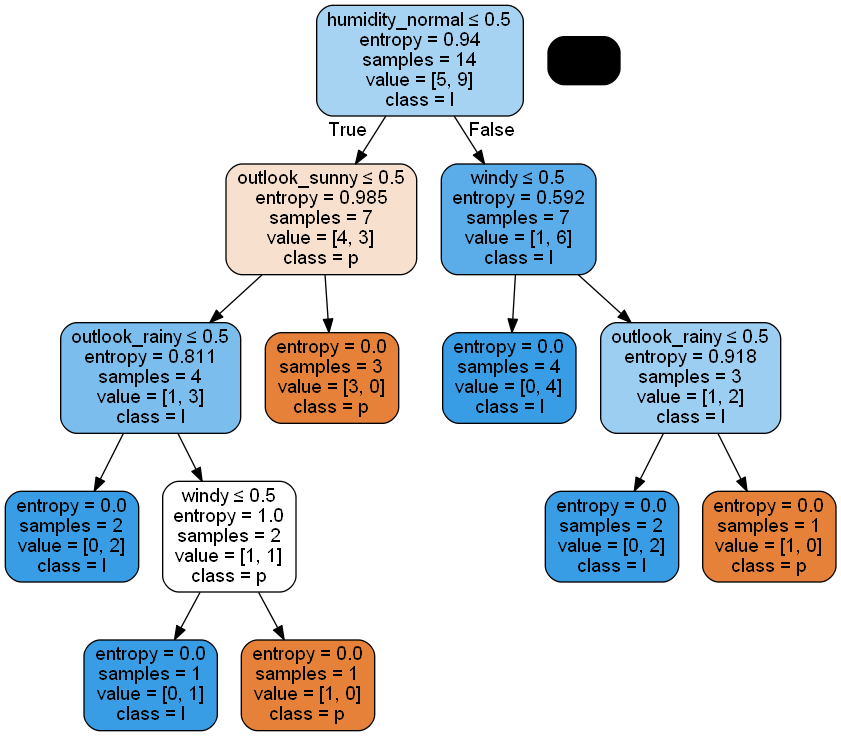

In [7]:
X_train = df.loc[:, df.columns != 'play']
y_train = df.loc[:, df.columns == 'play']
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,y_train)
plot_decision_tree(clf, X_train.columns,df.columns[1])

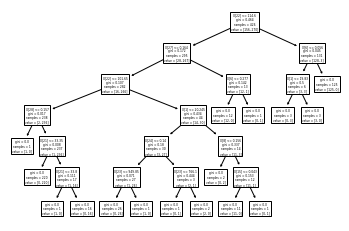

In [2]:
%matplotlib inline
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
clf = DecisionTreeClassifier(max_depth = 1000)
x_train,x_test,y_train,y_test = train_test_split(x,y)

fig = clf.fit(x_train,y_train)
tree.plot_tree(fig)
plt.show();